## Using Entire history of state measurements

In [ ]:
# Find the distributions as a function of t (abstract over number of time steps)
# I also want to see state paths that are generated (2d graph against time)
# Find distributions abstracted over values of a
# Find distributions abstracted over initial state?
# Find distributions abstracted over spread of noise, and maybe mean?

import numpy as np
from functools import reduce
import matplotlib.pyplot as plt

np.random.seed()

x0 = 1
a_hat0 = 0
y0 = 0
sigma = 0.01
u = 200
a = 2
T = 20

def trial():
    w_trace = []
    x_trace = [x0]
    a_hat_trace = [a_hat0]
    y_trace = [y0]

    for i in range(T):
        x_t = x_trace[-1]
        a_hat_t = a_hat_trace[-1]
        y_t = y_trace[-1]
        w_t = np.random.normal()*sigma
        x_new = (a-a_hat_t)*x_t + w_t + u
        y_new = y_t + x_t**2
        a_hat_new = (a_hat_t*y_t + a*x_t**2 + w_t*x_t)/(y_t+x_t**2)
        x_trace.append(x_new)
        y_trace.append(y_new)
        a_hat_trace.append(a_hat_new)
        w_trace.append(w_t)
    plt.stem(x_trace)
    plt.figure()
    plt.stem(a_hat_trace)
    return a_hat_trace[-1]

ahats = []

for i in range(1):
    ahats.append(trial())

In [ ]:
print(np.mean(ahats)-a, np.var(ahats))

## Using only last two measurements

In [ ]:
# Find the distributions as a function of t (abstract over number of time steps)
# I also want to see state paths that are generated (2d graph against time)
# Find distributions abstracted over values of a
# Find distributions abstracted over initial state?
# Find distributions abstracted over spread of noise, and maybe mean?

import numpy as np
from functools import reduce
import matplotlib.pyplot as plt

np.random.seed()

x0 = 1
a_hat0 = 0
y0 = 0
sigma = 0.01
u = 200
a = 2
T = 20

def trial():
    w_trace = []
    x_trace = [x0]
    a_hat_trace = [a_hat0]
    y_trace = [y0]

    for i in range(T):
        x_t = x_trace[-1]
        if len(x_trace) < 2:
            x_t_1 = 0
        else:
            x_t_1 = x_trace[-2]
        a_hat_t = a_hat_trace[-1]
        y_t = y_trace[-1]
        w_t = np.random.normal()*sigma
        x_new = (a-a_hat_t)*x_t + w_t + u
        y_new = y_t + x_t**2
        a_hat_new = (a_hat_t*x_t_1**2 + a*x_t**2 + w_t*x_t)/(x_t_1**2+x_t**2)
        x_trace.append(x_new)
        y_trace.append(y_new)
        a_hat_trace.append(a_hat_new)
        w_trace.append(w_t)
    plt.stem(x_trace)
    plt.figure()
    plt.stem(a_hat_trace)
    return a_hat_trace[-1]

ahats = []

for i in range(10):
    ahats.append(trial())

## Looking at having two players (recheck equations and code)

In [ ]:
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt

np.random.seed()

x0 = 1
a_hat0 = 0
y0 = 0
a = 2
T = 1000

def trial():
    x_trace = [x0]
    a_hat_trace = [a_hat0]
    y_trace = [y0]
    
    # Correct this to account for estimation by only subtracting their input from the state (two different a hats)
    for i in range(T):
        x_t = x_trace[-1]
        a_hat_t = a_hat_trace[-1]
        y_t = y_trace[-1]
        u1 = -a_hat_t * x_t
        u2 = -a_hat_t * x_t
        x_new = a*x_t + u1 + u2
        y_new = y_t + x_t**2
        a_hat_new = (a_hat_t*y_t + a*x_t**2)/(y_t+x_t**2)
        x_trace.append(x_new)
        y_trace.append(y_new)
        a_hat_trace.append(a_hat_new)
    #plt.stem(x_trace)
    return a_hat_trace[-1]

ahats = []

for i in range(100):
    ahats.append(trial())

## Start of visualization code

The histograms if viewed, should have the same bin spacing

In [ ]:
rand_nums = []
for i in range(100000):
    rand_nums.append(np.random.normal())
n, bins, _ = plt.hist(rand_nums, 100, range=(-10,10))
n1, bins1, _ = plt.hist(np.multiply(rand_nums, 2), bins=bins)
n2, bins2, _ = plt.hist(np.multiply(rand_nums, 5), bins=bins)

In [17]:
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt

np.random.seed()

def trial(a, u, sigma_x, T):
    np.random.seed()
    w_trace = []
    x_trace = [np.random.normal()*sigma_x]
    a_hat_trace = [0]
    y_trace = [0]

    for i in range(T):
        # Get current state
        x_t = x_trace[-1]
        a_hat_t = a_hat_trace[-1]
        y_t = y_trace[-1]
        w_t = np.random.normal()
        
        # State update
        x_new = (a-a_hat_t)*x_t + w_t + u
        y_new = y_t + x_t**2
        a_hat_new = (a_hat_t*y_t + a*x_t**2 + w_t*x_t)/(y_t+x_t**2)
        
        # Add to trace
        x_trace.append(x_new)
        y_trace.append(y_new)
        a_hat_trace.append(a_hat_new)
        w_trace.append(w_t)
    w_trace.append(np.random.normal())
    return np.array((x_trace, a_hat_trace, np.array(w_trace)))

def generate_data_with_params(a, u, sigma_x, T, N):
    trials = []
    for i in range(N):
        trials.append(trial(a, u, sigma_x, T))
    return trials

In [12]:
def generate_histograms(exps, hist_bins, ahat_endpoints, x_endpoints):
    ahat_histograms = []
    state_histograms = []
    abin = None
    xbin = None
    for j in range(len(exps)):
        XNs = []
        Ns = []
        # change this time variable somehow
        for i in range(31):
            N, abin = np.histogram(exps[j][:, 1, i], hist_bins, range=ahat_endpoints)
            XN, xbin = np.histogram(exps[j][:, 0, i], hist_bins, range=x_endpoints)
            Ns.append(N)
            XNs.append(XN)
        ahat_histograms.append(np.array(Ns))
        state_histograms.append(np.array(XNs))
    return ahat_histograms, state_histograms, abin, xbin

def plot_histograms(histograms, brightness, hist_bins, abin, xbin):
    f, ax = plt.subplots(len(histograms[0]), 2, figsize=(15, 15))
    for j in range(len(histograms[0])):
        ax[j,0].imshow(np.power(histograms[0][j], brightness))
        ax[j,0].set_xticks(range(hist_bins+1)[::hist_bins//5])
        ax[j,0].set_xticklabels(np.around(abin[::hist_bins//5], decimals=1));
        ax[j,1].imshow(np.power(histograms[1][j], brightness))
        ax[j,1].set_xticks(range(hist_bins+1)[::hist_bins//5])
        ax[j,1].set_xticklabels(np.around(xbin[::hist_bins//5], decimals=1));

#experiments = []
#for param in np.logspace(-1, 3, num=7):
#    trials = generate_data_with_params(10, param, 0.1, 30, 1000)
#    trials = np.array(trials)
#    experiments.append(trials)
#plot_exp(experiments, 100, [(-5 + 10, 10 + 5) for p in paramspace], [(0, 1000) for p in paramspace])

In [74]:
experiments = []
paramspace = np.logspace(-1, 3, num=7)
for p in paramspace:
    trials = generate_data_with_params(p, 20, 0.1, 30, 1000)
    trials = np.array(trials)
    experiments.append(trials)

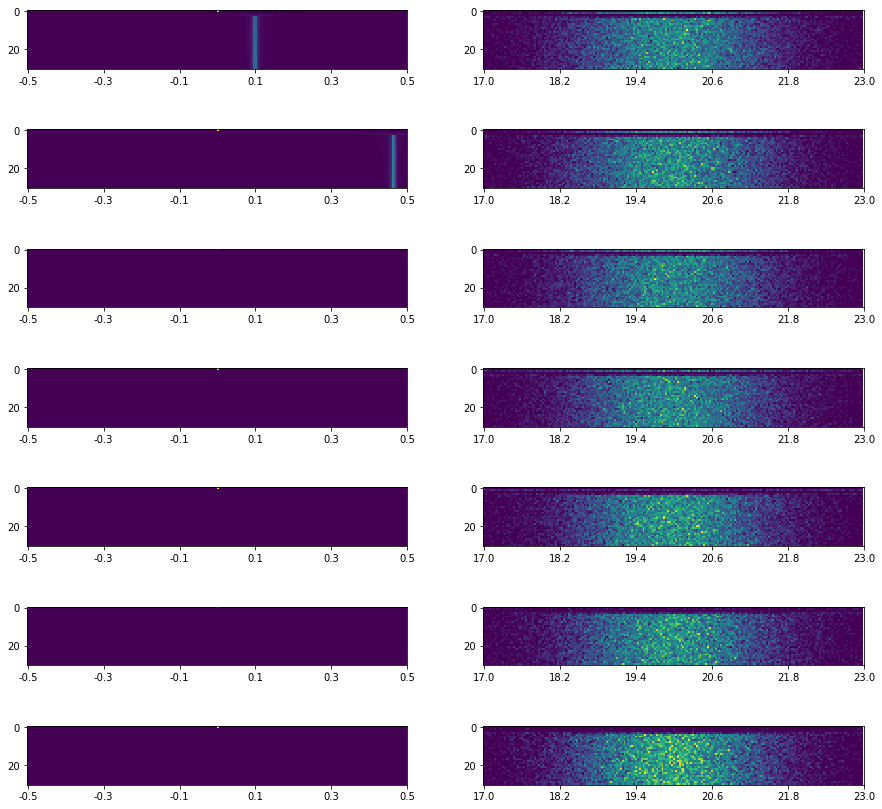

In [84]:
ahh, xhh, abin, xbin = generate_histograms(experiments, 200, (-0.5, 0.5), (17, 23));
plot_histograms((ahh,xhh), 1, 200, abin, xbin)

In [2]:
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt

np.random.seed()

def trials(a, u, sigma_x, N, T):
    np.random.seed()
    w_trace = []
    x_trace = [np.random.normal(scale=sigma_x, size=N)]
    a_hat_trace = [np.zeros(N)]
    y_trace = [np.zeros(N)]
    a_vec = np.repeat(a, N)
    u_vec = np.repeat(u, N)
    
    for i in range(T-1):
        # Get current state
        x_t = x_trace[-1]
        a_hat_t = a_hat_trace[-1]
        y_t = y_trace[-1]
        w_t = np.random.normal(size=N)
        
        # State update
        x_new = np.multiply(a_vec-a_hat_t, x_t) + w_t + u_vec
        x_sq = np.multiply(x_t,x_t)
        y_new = y_t + x_sq
        a_hat_new = np.divide(np.multiply(a_hat_t, y_t) + np.multiply(a_vec, x_sq) + np.multiply(w_t,x_t), y_new)
        
        # Add to trace
        x_trace.append(x_new)
        y_trace.append(y_new)
        a_hat_trace.append(a_hat_new)
        w_trace.append(w_t)
    w_trace.append(np.random.normal(size=N))
    return x_trace, a_hat_trace

def make_time_histogram(data, num_bins, center, reach):
    hists = []
    window = (center-reach, center+reach)
    for time_slice in data:
        bin_count, bin_labels = np.histogram(time_slice, num_bins, range=window)
        hists.append(bin_count)
    return hists, bin_labels

def plot_time_histogram(hist, bins, brightness):
    plt.figure(figsize=(5, 5))
    plt.imshow(np.power(hist, brightness))
    num_bins = len(bins) - 1
    loc = range(num_bins)[::num_bins//5]
    labels = bins[::num_bins//5]
    plt.xticks(loc, labels)
    
def plot_hist_on_sub(sub, hist, bins, brightness):
    sub.imshow(np.power(hist, brightness))
    num_bins = len(bins) - 1
    loc = range(num_bins)[::num_bins//5]
    labels = bins[::num_bins//5]
    sub.set_xticks(loc)
    sub.set_xticklabels(labels)

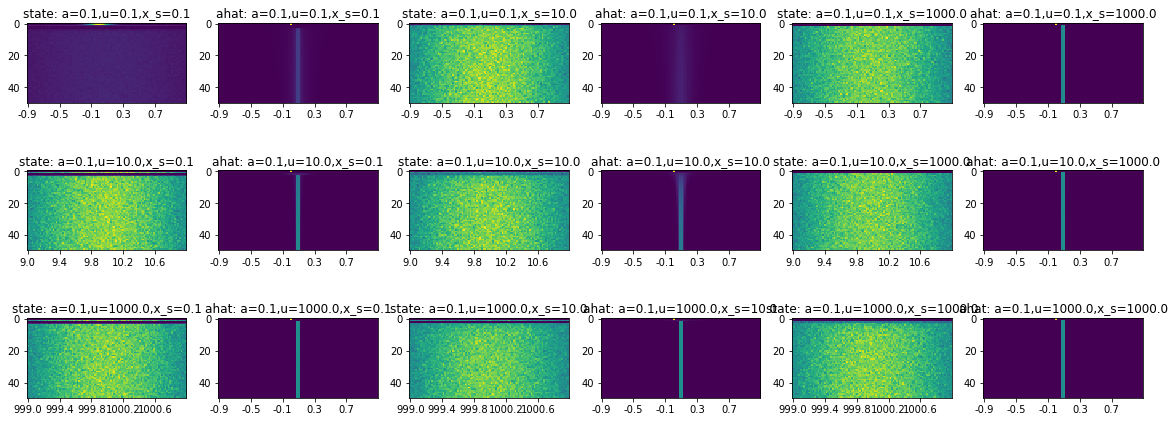

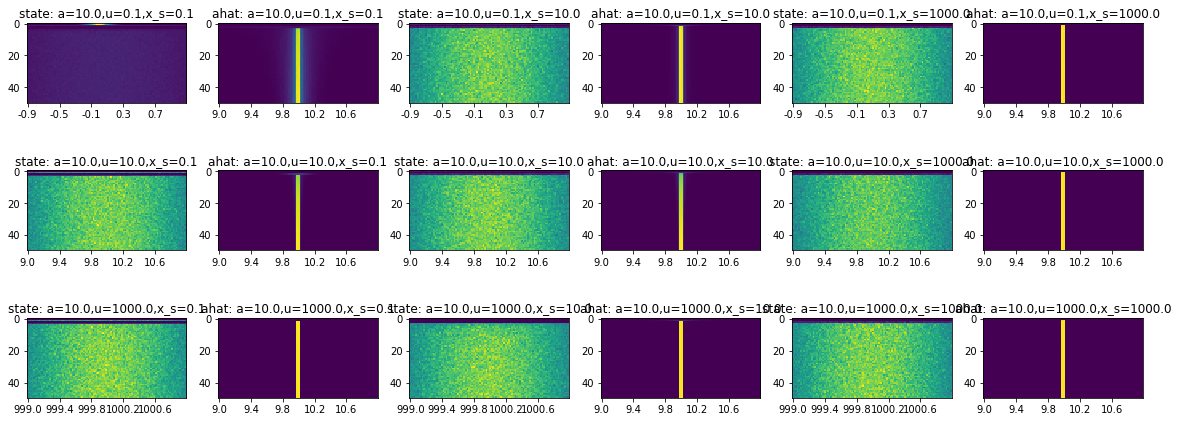

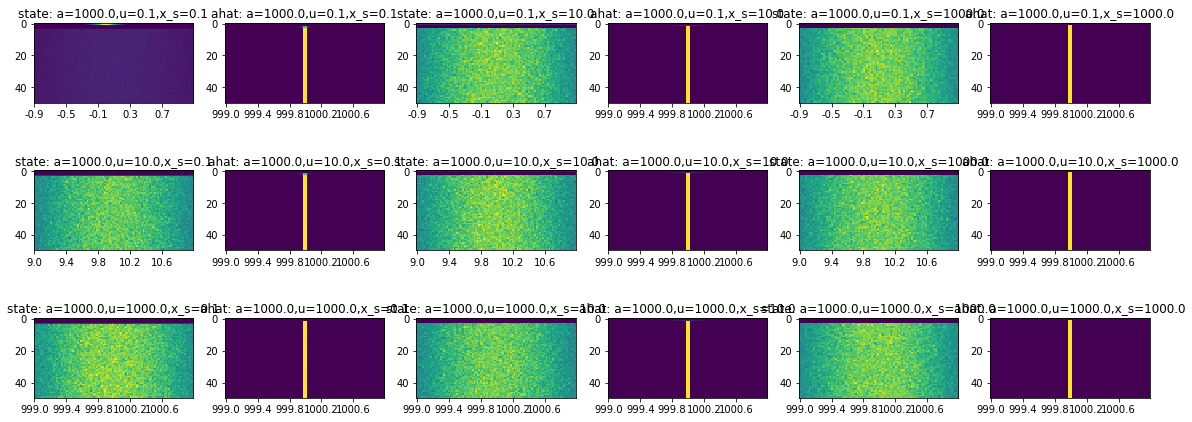

In [13]:
a_n, u_n, x_s_n = 3, 3, 3

for a in np.logspace(-1, 3, a_n):
    f, ax = plt.subplots(u_n, 2*x_s_n, figsize=(20,7))
    for u, i in zip(np.logspace(-1, 3, u_n), range(u_n)):
        for x_s, j in zip(np.logspace(-1, 3, x_s_n), range(x_s_n)):
            x_tr, ah_tr = trials(a, u, x_s, 20000, 50)
            xh, x_bins = make_time_histogram(x_tr, 100, u, 1)
            ah, a_bins = make_time_histogram(ah_tr, 100, a, 1)
            ax[i, 2*j].set_title('state: a={0},u={1},x_s={2}'.format(a, u, x_s))
            ax[i, 2*j+1].set_title('ahat: a={0},u={1},x_s={2}'.format(a, u, x_s))
            plot_hist_on_sub(ax[i,2*j], xh, np.around(x_bins, decimals=3), 1)
            plot_hist_on_sub(ax[i,2*j+1], ah, np.around(a_bins, decimals=3), 1)
    f.subplots_adjust(bottom=0.05)

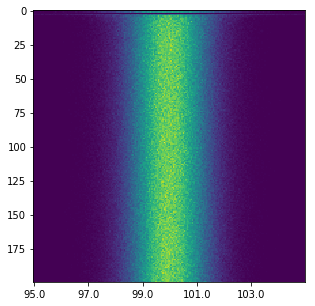

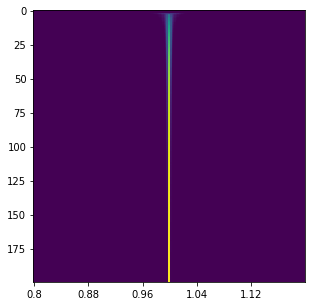

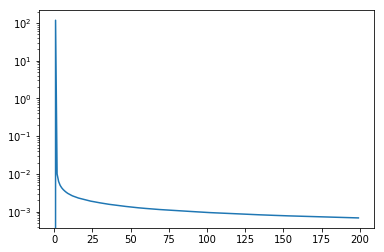

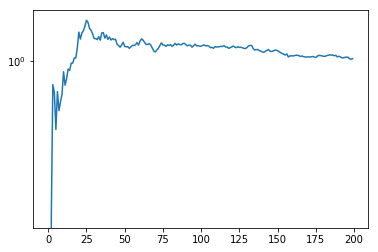

In [225]:
a = 1
u = 100
x_tr, ah_tr = trials(a, u, 1, 10000, 200)

xh, x_bins = make_time_histogram(x_tr, 200, u, 5)
ah, a_bins = make_time_histogram(ah_tr, 200, a, 0.2)

plot_time_histogram(xh, x_bins, 1)
plot_time_histogram(ah, a_bins, 1)

plt.hist(ah_tr[-1], 100);
plt.figure()
plt.hist(x_tr[-1], 100);

plt.figure()
plt.plot(np.sqrt(np.var(ah_tr, axis=1)))
plt.yscale('log')
plt.figure()
plt.plot(np.mean(ah_tr, axis=1))
plt.yscale('log')